In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [9]:
df=pd.read_csv("bank.csv",delimiter=";")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Exploratry Data Analysis**

In [10]:
print("Dataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None

Dataset Description:
               age       balance          day     duration

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
# Check Uniqness of values
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nUnique values in {col}:")
        print(df[col].unique())



Unique values in job:
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

Unique values in marital:
['married' 'single' 'divorced']

Unique values in education:
['primary' 'secondary' 'tertiary' 'unknown']

Unique values in default:
['no' 'yes']

Unique values in housing:
['no' 'yes']

Unique values in loan:
['no' 'yes']

Unique values in contact:
['cellular' 'unknown' 'telephone']

Unique values in month:
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

Unique values in poutcome:
['unknown' 'failure' 'other' 'success']

Unique values in y:
['no' 'yes']


In [13]:
# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Identify categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Initialize and fit the encoder
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
encoder.fit(X[categorical_columns])

# Save the fitted encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

C:\Users\shubh\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
# Fit and transform on the training set
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
X_encoded.columns = encoder.get_feature_names_out()

numerical_cols = X.select_dtypes(exclude='object').columns.tolist()
# Combine numerical and encoded features
X_final = pd.concat([X[numerical_cols].reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)


C:\Users\shubh\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
X_final.head(5) #Each value is categorised

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,4789,11,220,1,339,4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,35,1350,16,185,1,330,1,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,1476,3,199,4,-1,0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,59,0,5,226,1,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
df_encoded = pd.get_dummies(df, drop_first=True) 
y = df_encoded['y_yes']

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_final[numerical_cols]=ss.fit_transform(X_final[numerical_cols])

In [19]:
X_final.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


C:\Users\shubh\AppData\Local\Temp\ipykernel_13280\3772161043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette="coolwarm")


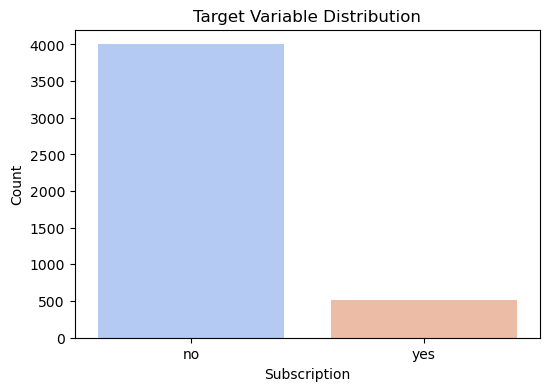

In [22]:
# Distribution of the target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette="coolwarm")
plt.title("Target Variable Distribution")
plt.xlabel("Subscription")
plt.ylabel("Count")
plt.show()

**Handling imbalance of data**

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X_final,y)
y_sm.value_counts(),

(0    4000
 1    4000
 Name: y_yes, dtype: int64,)

**Spliting of data**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [31]:
clf = DecisionTreeClassifier(criterion="gini",max_depth=9 ,random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [32]:
y_pred=clf.predict(X_test)

**Evaluating Model**

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [5, 7,9],
    'criterion': ['gini', 'entropy']
}

# Grid Search CV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)



Best Parameters: {'criterion': 'gini', 'max_depth': 9}
Best Accuracy: 0.8639062500000001


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       801
           1       0.84      0.86      0.85       799

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600



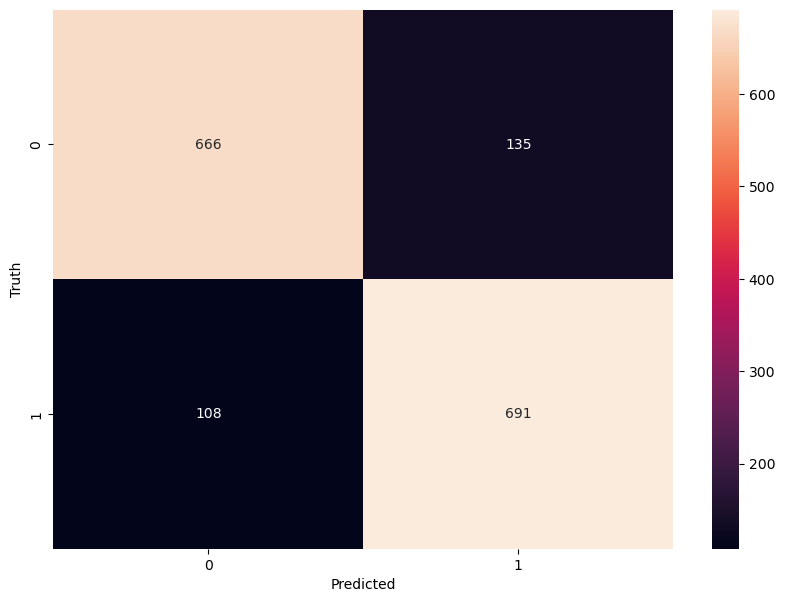

In [41]:
from sklearn.metrics import confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test, y_pred))

In [42]:
print(cm)

[[666 135]
 [108 691]]


**Descision Tree Visualization**

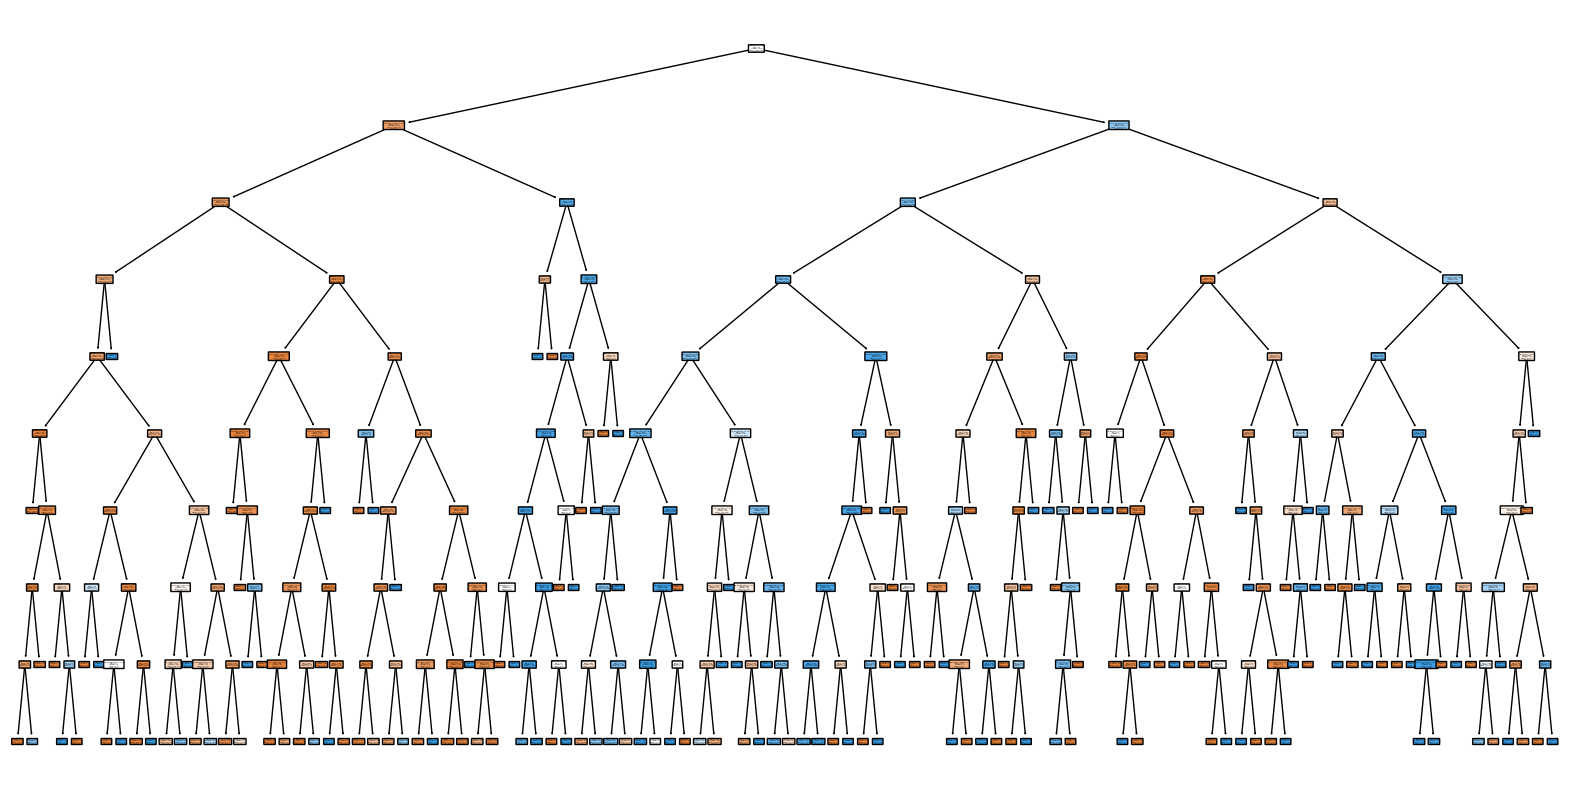

In [44]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["No", "Yes"], rounded=True)
plt.show()


In [45]:
import pickle

In [46]:

with open('churn_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [47]:
clf = DecisionTreeClassifier(criterion="gini",max_depth=9, random_state=42)
with open('churn_model.pkl', 'rb') as file:
    clf=pickle.load(file)

In [44]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(ss, file)